In [1]:
sc

In [2]:
df = spark.read.csv('2016_Green_Taxi_Trip_Data.csv', 
                    header = True, 
                    inferSchema = True).cache()

In [3]:
list(enumerate(df.dtypes))

[(0, ('VendorID', 'int')),
 (1, ('lpep_pickup_datetime', 'string')),
 (2, ('Lpep_dropoff_datetime', 'string')),
 (3, ('Store_and_fwd_flag', 'string')),
 (4, ('RateCodeID', 'int')),
 (5, ('Pickup_longitude', 'double')),
 (6, ('Pickup_latitude', 'double')),
 (7, ('Dropoff_longitude', 'double')),
 (8, ('Dropoff_latitude', 'double')),
 (9, ('Passenger_count', 'int')),
 (10, ('Trip_distance', 'double')),
 (11, ('Fare_amount', 'double')),
 (12, ('Extra', 'double')),
 (13, ('MTA_tax', 'double')),
 (14, ('Tip_amount', 'double')),
 (15, ('Tolls_amount', 'double')),
 (16, ('Ehail_fee', 'string')),
 (17, ('improvement_surcharge', 'double')),
 (18, ('Total_amount', 'double')),
 (19, ('Payment_type', 'int')),
 (20, ('Trip_type ', 'int')),
 (21, ('PULocationID', 'int')),
 (22, ('DOLocationID', 'int'))]

In [5]:
dfPassenger = df.groupBy('`Passenger_count`').count()
dfPassenger = dfPassenger.sort('Passenger_count', ascending=True)
dfPassenger = dfPassenger.filter(dfPassenger.Passenger_count > 0)
#dfPassenger.select('Passenger_count').show(10)
#dfPassenger = dfPassenger.sort('Passenger_count', ascending=True)
dfPassenger.show()
#type(dfPassenger)

+---------------+--------+
|Passenger_count|   count|
+---------------+--------+
|              1|13838473|
|              2| 1251744|
|              3|  353593|
|              4|  109868|
|              5|  564322|
|              6|  262247|
|              7|     404|
|              8|     391|
|              9|     115|
+---------------+--------+



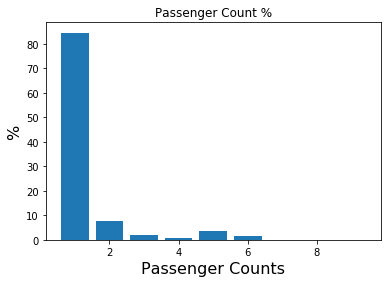

In [6]:
import matplotlib.pyplot as plt

l = [(1,13838473), (2,1251744), (3,353593 ), (4,109868 ), (5,564322 ), (6,262247 ), (7,404 ),(8,391 ),(9,115 )]

total = 0

for i in l:
    total += i[1]

total

x = [i[0] for i in l]
y = [float(i[1])/float(total) * 100 for i in l]

plt.title("Passenger Count %")
plt.xlabel("Passenger Counts", fontsize = 16)
plt.ylabel("%", fontsize = 16)
plt.bar(x,y)
plt.show()